In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv("/Users/shihan/Desktop/Spring 25/DS Bootcamp/project/sentimentdataset.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [56]:
df[['Hashtag1', 'Hashtag2']] = df['Hashtags'].fillna('').str.lower().str.split(expand=True, n=1)

In [45]:
top_comtag = df['Hashtags'].value_counts().head(10).index.tolist()
print(top_comtag)

[' #Compassionate #TearsOfEmpathy ', ' #Proud #ScalingPeaks ', ' #Hopeful #SeedsOfOptimism ', ' #Playful #CarnivalEscapade ', ' #Contentment #TranquilWaters ', ' #Inspired #TalesToTheStars ', ' #Inspired #CloudsOfCreativity ', ' #Dismissive #IndifferencePerformance ', ' #Indifference #DriftingThroughLife       ', ' #Shame #Injustice                           ']


In [49]:
top_indtag = pd.concat([df['Hashtag1'], df['Hashtag2']]).value_counts().head(10)
top_indtag = top_indtag.index.tolist()
print(top_indtag)

['#serenity', '#gratitude', '#excitement', '#despair', '#nostalgia', '#contentment', '#curiosity', '#hopeful', '#awe', '#grief']


In [47]:
engagement_comtag = df.groupby('Hashtags')[['Likes', 'Retweets']].mean().sort_values(by='Likes', ascending=False)
print(engagement_comtag)

                                                  Likes  Retweets
Hashtags                                                         
#Motivation #FitnessGoals                          80.0      40.0
#Joy #SimpleMoments                                80.0      40.0
#Thrill #CulturalCelebration                       80.0      40.0
#Disappointment #SoccerDefeats                     80.0      40.0
#Enthusiasm #JustinBieber                          80.0      40.0
...                                                 ...       ...
#SickDay #Health                                   15.0       7.0
#Grief #Loss                                       15.0       8.0
#Numbness #EmotionalShield                         15.0       8.0
#Traffic #Morning                                  10.0       5.0
#Despair #Struggle                                 10.0       5.0

[697 rows x 2 columns]


In [52]:
indtag_engagement = []

for tag in top_indtag:
    mask = (df['Hashtag1'] == tag) | (df['Hashtag2'] == tag)
    avg_likes = df.loc[mask, 'Likes'].mean()
    avg_retweets = df.loc[mask, 'Retweets'].mean()
    indtag_engagement.append({'Hashtag': tag, 'Likes': avg_likes, 'Retweets': avg_retweets})

In [53]:
engagement_indtag = pd.DataFrame(indtag_engagement)
engagement_indtag = engagement_indtag.sort_values(by='Likes', ascending=False)
print(engagement_indtag)

        Hashtag      Likes   Retweets
2   #excitement  54.583333  27.166667
5  #contentment  49.100000  24.600000
1    #gratitude  46.538462  23.230769
8          #awe  44.444444  22.333333
0     #serenity  42.400000  21.133333
9        #grief  39.444444  19.666667
6    #curiosity  38.800000  19.400000
4    #nostalgia  36.363636  18.000000
3      #despair  35.636364  17.909091
7      #hopeful  28.888889  14.444444


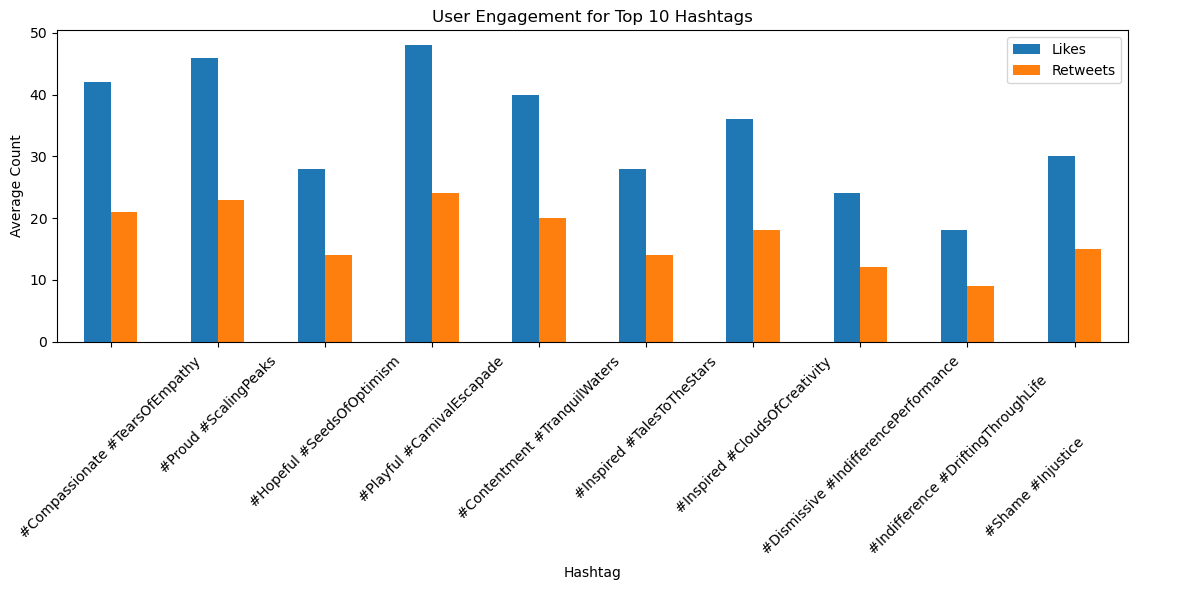

In [55]:
top_engcom = engagement_comtag.loc[top_comtag]

top_engcom.plot(kind='bar', figsize=(12, 6))
plt.title('User Engagement for Top 10 Combined Hashtags')
plt.xlabel('Hashtag')
plt.ylabel('Average Count')
plt.xticks(rotation=45)
plt.legend(['Likes', 'Retweets'])
plt.tight_layout()
plt.show()

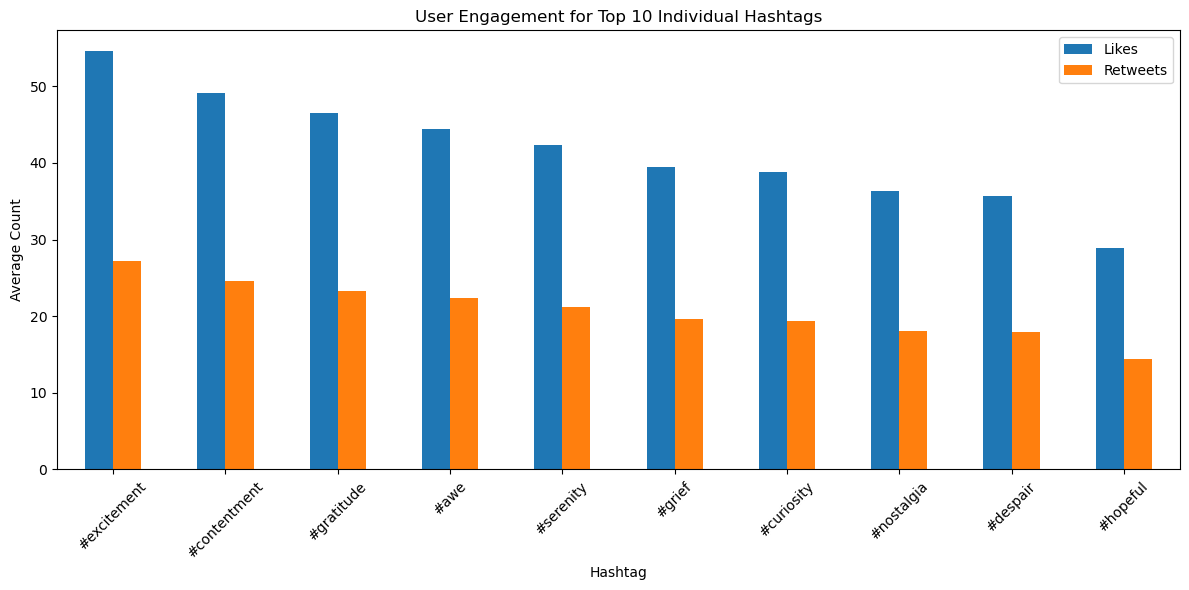

In [57]:
engagement_indtag.set_index('Hashtag')[['Likes', 'Retweets']].plot(kind='bar', figsize=(12, 6))

plt.title('User Engagement for Top 10 Individual Hashtags')
plt.xlabel('Hashtag')
plt.ylabel('Average Count')
plt.xticks(rotation=45)
plt.legend(['Likes', 'Retweets'])
plt.tight_layout()
plt.show()